#minmax scaling 

## 데이터 임포트 및 라이브러리

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DSL/2023-1 과제/[0202][HW]_DecisionTree_and_Ensemble/DecisionTree&Ensemble/Personal Loan.csv')
data = data.drop(columns = ['ID', 'ZIP Code'])
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,46,22,70,4,1.9,1,212,0,0,0,0,1
2496,63,37,32,3,0.7,2,141,0,0,0,0,0
2497,33,9,14,3,0.9,3,114,0,0,0,0,0
2498,38,14,111,2,6.1,1,326,0,0,0,0,0


In [ ]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,2500.000000,2500.000000,2500.0000,2500.00000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,45.346000,20.120800,74.4472,2.40800,1.951284,1.86560,57.388400,0.102400,0.109600,0.062400,0.59760,0.290400
std,11.519521,11.523824,46.6724,1.15986,1.795449,0.83655,100.816403,0.303234,0.312453,0.241929,0.49048,0.454038
min,23.000000,-2.000000,8.0000,1.00000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,10.000000,39.0000,1.00000,0.700000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,20.000000,64.0000,2.00000,1.500000,2.00000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,30.000000,99.2500,4.00000,2.500000,3.00000,104.000000,0.000000,0.000000,0.000000,1.00000,1.000000
max,67.000000,42.000000,205.0000,4.00000,10.000000,3.00000,617.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale_data = X.drop(columns = ['Personal Loan',	'Securities Account',	'CD Account',	'Online'])
remaining_data = X[['Personal Loan',	'Securities Account',	'CD Account',	'Online']]

scaler = MinMaxScaler()
scaler.fit(scale_data)
scaled = scaler.transform(scale_data)

# numpy -> df
scaled_X = pd.DataFrame(data=scaled, columns=scale_data.columns)
scaled_X = pd.concat([scaled_X.reset_index(drop=True), remaining_data.reset_index(drop=True)], axis = 1)
scaled_X # 0~1 사이의 값들을 가짐을 확인할 수 있다.

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,0.045455,0.068182,0.208122,1.000000,0.16,0.0,0.000000,0,1,0,0
1,0.500000,0.477273,0.131980,0.666667,0.15,0.0,0.000000,0,1,0,0
2,0.363636,0.386364,0.015228,0.000000,0.10,0.0,0.000000,0,0,0,0
3,0.272727,0.250000,0.467005,0.000000,0.27,0.5,0.000000,0,0,0,0
4,0.272727,0.227273,0.187817,1.000000,0.10,0.5,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2495,0.522727,0.545455,0.314721,1.000000,0.19,0.0,0.343598,0,0,0,0
2496,0.909091,0.886364,0.121827,0.666667,0.07,0.5,0.228525,0,0,0,0
2497,0.227273,0.250000,0.030457,0.666667,0.09,1.0,0.184765,0,0,0,0
2498,0.340909,0.363636,0.522843,0.333333,0.61,0.0,0.528363,0,0,0,0


##학습 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=42, stratify = y)

In [ ]:
print(y.value_counts(normalize = True))
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.7096
1    0.2904
Name: CreditCard, dtype: float64
0    0.7095
1    0.2905
Name: CreditCard, dtype: float64
0    0.71
1    0.29
Name: CreditCard, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

start=time.time()

model = LogisticRegression(max_iter = 10000)
model_fit = model.fit(X_train, y_train)
print("Logistic Regression Accuracy for test data : {:.4f}".format(accuracy_score(y_test, model_fit.predict(X_test))))
print("Logistic Regression F1 score for test data : {:.4f}".format(f1_score(y_test, model_fit.predict(X_test))))
print(f'{time.time()-start:.4f}sec')

Logistic Regression Accuracy for test data : 0.7600
Logistic Regression F1 score for test data : 0.3103
0.0640sec


In [ ]:
from sklearn.ensemble import RandomForestClassifier

start=time.time()
rf = RandomForestClassifier(max_depth = 20, n_estimators = 100)
rf.fit(X_train, y_train)
print("Random Forest Classifier Accuracy for test data : {:.4f}".format(accuracy_score(y_test, rf.predict(X_test))))
print("Random Forest Classifier F1 score for test data : {:.4f}".format(f1_score(y_test, rf.predict(X_test))))
print(f'{time.time()-start:.4f}sec')

Random Forest Classifier Accuracy for test data : 0.7080
Random Forest Classifier F1 score for test data : 0.2981
0.5165sec


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start=time.time()
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
print("Gradient Boost Accuracy for test data : {:.4f}".format(accuracy_score(y_test, gb_clf.predict(X_test))))
print("Gradient Boost F1 score for test data : {:.4f}".format(f1_score(y_test, gb_clf.predict(X_test))))
print(f'{time.time()-start:.4f}sec')

Gradient Boost Accuracy for test data : 0.7600
Gradient Boost F1 score for test data : 0.3407
0.3618sec


## PCA


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=11) 
X_train_PCA=pca.fit_transform(X_train)
X_train_PCA.shape

(2000, 11)

In [ ]:
pca.explained_variance_ratio_[:] #각 잠재변수의 분산비율

array([0.2299228 , 0.17158962, 0.14487247, 0.12763093, 0.12357856,
       0.09880332, 0.03718799, 0.02923522, 0.02415797, 0.01267902,
       0.00034209])

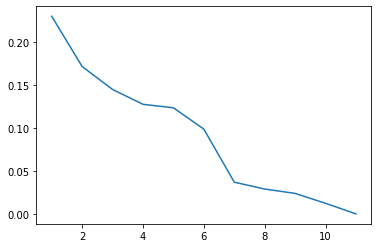

In [ ]:
plt.plot(range(1,12),pca.explained_variance_ratio_) #각 잠재변수의 분산비율 시각화
plt.show()

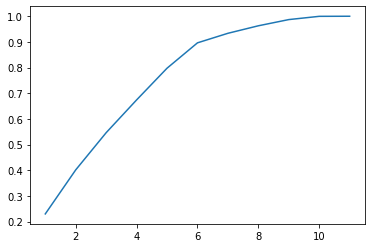

In [ ]:
cumulative = []
temp = 0
for i in range(0, 11):
    temp += pca.explained_variance_ratio_[i]
    cumulative.append(temp)

plt.plot(range(1,12),cumulative)
plt.show() #누적 분산비율 시각화

In [ ]:
for i in np.arange(1, 12):
  explained=np.sum(pca.explained_variance_ratio_[:i])
  print(i,'개의 잠재변수가 설명하는 분산은 전체 데이터의 {:.2f}%'.format(explained*100))

cumulative=np.array(cumulative)
print('전체 분산의 80%를 설명하기 위해서는 상위 {}개의 잠재변수 필요함'.format(np.where(cumulative>0.8)[0][0]))

1 개의 잠재변수가 설명하는 분산은 전체 데이터의 22.99%
2 개의 잠재변수가 설명하는 분산은 전체 데이터의 40.15%
3 개의 잠재변수가 설명하는 분산은 전체 데이터의 54.64%
4 개의 잠재변수가 설명하는 분산은 전체 데이터의 67.40%
5 개의 잠재변수가 설명하는 분산은 전체 데이터의 79.76%
6 개의 잠재변수가 설명하는 분산은 전체 데이터의 89.64%
7 개의 잠재변수가 설명하는 분산은 전체 데이터의 93.36%
8 개의 잠재변수가 설명하는 분산은 전체 데이터의 96.28%
9 개의 잠재변수가 설명하는 분산은 전체 데이터의 98.70%
10 개의 잠재변수가 설명하는 분산은 전체 데이터의 99.97%
11 개의 잠재변수가 설명하는 분산은 전체 데이터의 100.00%
전체 분산의 80%를 설명하기 위해서는 상위 5개의 잠재변수 필요함


In [ ]:
#fit은 주성분을 찾는것, transform은 주성분으로 변환하는 것

pca=PCA(n_components=7)
X_train_PCA=pca.fit_transform(X_train) #train은 fit + transform
X_test_PCA=pca.transform(X_test)       #test는 transform. 주성분은 train set에서 찾은 것을 사용해야 함
print('Original space:',X_train.shape)
print('After PCA:',X_train_PCA.shape)

Original space: (2000, 11)
After PCA: (2000, 7)


###PCA 이후 성능 비교


In [ ]:
start=time.time()

model = LogisticRegression(max_iter = 10000)
model_fit = model.fit(X_train_PCA, y_train)
print("Logistic Regression Accuracy for test data : {:.4f}".format(accuracy_score(y_test, model_fit.predict(X_test_PCA))))
print("Logistic Regression F1 score for test data : {:.4f}".format(f1_score(y_test, model_fit.predict(X_test_PCA))))
print(f'{time.time()-start:.4f}sec')


Logistic Regression Accuracy for test data : 0.7480
Logistic Regression F1 score for test data : 0.2588
0.0183sec


In [ ]:
start=time.time()
rf = RandomForestClassifier(max_depth = 20, n_estimators = 100)
rf.fit(X_train_PCA,y_train)
print("Random Forest Accuracy for test data : {:.4f}".format(accuracy_score(y_test, rf.predict(X_test_PCA))))
print("Random Forest F1 score for test data : {:.4f}".format(f1_score(y_test, rf.predict(X_test_PCA))))
print(f'{time.time()-start:.4f}sec')

Random Forest Accuracy for test data : 0.7140
Random Forest F1 score for test data : 0.3644
0.5368sec


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start=time.time()
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_PCA, y_train)

print("Gradient Boost Accuracy for test data : {:.4f}".format(accuracy_score(y_test, gb_clf.predict(X_test_PCA))))
print("Gradient Boost F1 score for test data : {:.4f}".format(f1_score(y_test, gb_clf.predict(X_test_PCA))))
print(f'{time.time()-start:.4f}sec')

Gradient Boost Accuracy for test data : 0.7380
Gradient Boost F1 score for test data : 0.2762
0.5497sec


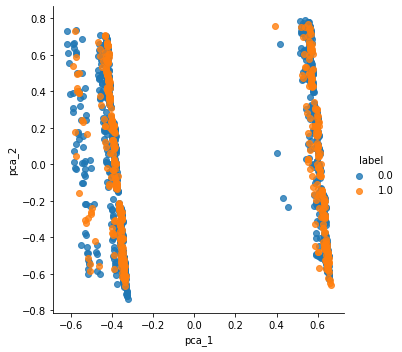

In [ ]:
X_train_pca=pd.DataFrame(X_train_PCA).loc[:,0:1]
X_train_pca=pd.concat((X_train_pca, y_train), axis=1) 
X_train_pca.columns=['pca_1', 'pca_2', 'label']

sns.lmplot(x='pca_1',y='pca_2',data=X_train_pca,hue='label',fit_reg=False)
plt.show()

### KPCA-rbf

In [ ]:
from sklearn.decomposition import KernelPCA
start=time.time()
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True) #방사형 커널 사용
X_train_rbf_pca=rbf_pca.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

0.7261sec


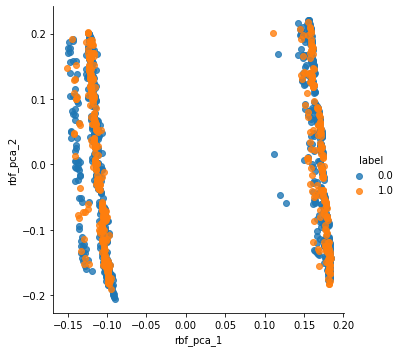

In [ ]:
X_train_rbf_pca=pd.DataFrame(X_train_rbf_pca).loc[:,0:1]
X_train_rbf_pca=pd.concat((X_train_rbf_pca, y_train), axis=1) 
X_train_rbf_pca.columns=['rbf_pca_1', 'rbf_pca_2', 'label']

sns.lmplot(x='rbf_pca_1',y='rbf_pca_2',data=X_train_rbf_pca,hue='label',fit_reg=False)
plt.show()

###KPCA-sigmoid

In [ ]:
start=time.time()
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True) #시그모이드 커널 사용
X_train_sig_pca=sig_pca.fit_transform(X_train)
#X_test_rbf_pca=sig_pca.fit_transform(X_test)
print(f'{time.time()-start:.4f}sec')

0.8322sec


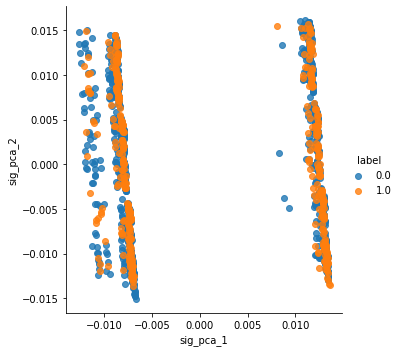

In [ ]:
X_train_sig_pca=pd.DataFrame(X_train_sig_pca).loc[:,0:1]
X_train_sig_pca=pd.concat((X_train_sig_pca, y_train), axis=1) 
X_train_sig_pca.columns=['sig_pca_1', 'sig_pca_2', 'label']

sns.lmplot(x='sig_pca_1',y='sig_pca_2',data=X_train_sig_pca,hue='label',fit_reg=False)
plt.show()

###KPCA-poly

In [ ]:
start=time.time()
poly_pca = KernelPCA(n_components = 2, kernel="poly", gamma=0.001, coef0=1, fit_inverse_transform=True) #시그모이드 커널 사용
X_train_poly_pca=poly_pca.fit_transform(X_train)
#X_test_rbf_pca=poly_pca.fit_transform(X_test)
print(f'{time.time()-start:.4f}sec')

0.8172sec


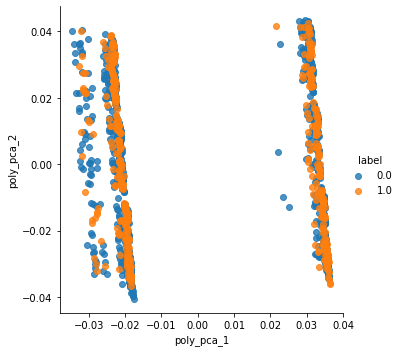

In [ ]:
X_train_poly_pca=pd.DataFrame(X_train_poly_pca).loc[:,0:1]
X_train_poly_pca=pd.concat((X_train_poly_pca, y_train), axis=1) 
X_train_poly_pca.columns=['poly_pca_1', 'poly_pca_2', 'label']

sns.lmplot(x='poly_pca_1',y='poly_pca_2',data=X_train_poly_pca,hue='label',fit_reg=False)
plt.show()

###KPCA-cos

In [ ]:
start=time.time()
cos_pca = KernelPCA(n_components = 2, kernel="cosine", gamma=0.001, coef0=1, fit_inverse_transform=True) #시그모이드 커널 사용
X_train_cos_pca=cos_pca.fit_transform(X_train)
#X_test_rbf_pca=cos_pca.fit_transform(X_test)
print(f'{time.time()-start:.4f}sec')

0.5144sec


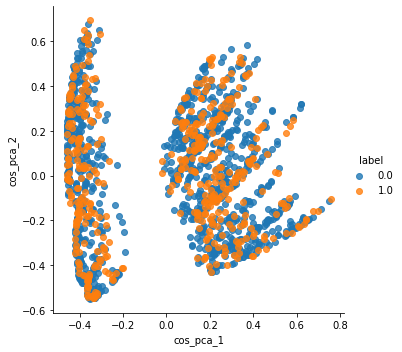

In [ ]:
X_train_cos_pca=pd.DataFrame(X_train_cos_pca).loc[:,0:1]
X_train_cos_pca=pd.concat((X_train_cos_pca, y_train), axis=1) 
X_train_cos_pca.columns=['cos_pca_1', 'cos_pca_2', 'label']

sns.lmplot(x='cos_pca_1',y='cos_pca_2',data=X_train_cos_pca,hue='label',fit_reg=False)
plt.show()

###MDS

In [ ]:
#시간 엄청 오래 걸림
from sklearn.manifold import MDS
start=time.time()
mds = MDS(n_components=2, random_state=42)
X_train_mds = mds.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

KeyboardInterrupt: ignored

In [ ]:
X_train_mds=pd.DataFrame(X_train_mds).loc[:,0:1]
X_train_mds=pd.concat((X_train_mds, y_train), axis=1) 
X_train_mds.columns=['mds_1', 'mds_2', 'label']
X_train_mds

sns.lmplot(x='mds_1',y='mds_2',data=X_train_mds,hue='label',fit_reg=False)
plt.show()

###t-SNE

In [ ]:
from sklearn.manifold import TSNE
start=time.time()
tsne = TSNE(n_components=2, random_state=42) #4미만의 공간으로
X_train_tsne = tsne.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

In [ ]:
X_train_tsne=pd.DataFrame(X_train_tsne).loc[:,0:1]
X_train_tsne=pd.concat((X_train_tsne, y_train), axis=1) 
X_train_tsne.columns=['tsne_1', 'tsne_2', 'label']
X_train_tsne

sns.lmplot(x='tsne_1',y='tsne_2',data=X_train_tsne,hue='label',fit_reg=False)
plt.show()

### LLE
- 주변 이웃들의 관계를 저차원에서도 그대로 유지하는 저차원 공간을 찾자

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
start=time.time()
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_train_lle = lle.fit_transform(X_train)
#X_test_lle=lle.transform(X_test)
print(f'{time.time()-start:.4f}sec')

In [ ]:
X_train_lle=pd.DataFrame(X_train_lle).loc[:,0:1]
X_train_lle=pd.concat((X_train_lle, y_train), axis=1) 
X_train_lle.columns=['lle_1', 'lle_2', 'label']
X_train_lle

sns.lmplot(x='lle_1',y='lle_2',data=X_train_lle,hue='label',fit_reg=False)
plt.show()

### ISOMAP
- 지오데식 거리를 최대한 보존하는 저차원의 공간을 찾자

In [ ]:
from sklearn.manifold import Isomap
start=time.time()
isomap=Isomap(n_neighbors=5,n_components=2,n_jobs=4)         
X_train_isomap=isomap.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

In [ ]:
X_train_isomap=pd.DataFrame(X_train_isomap).loc[:,0:1]
X_train_isomap=pd.concat((X_train_isomap, y_train), axis=1) 
X_train_isomap.columns=['isomap_1', 'isomap_2', 'label']

sns.lmplot(x='isomap_1',y='isomap_2',data=X_train_isomap,hue='label',fit_reg=False)
plt.show()

###LDA



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
start=time.time()
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train) #차원축소 과정에 y라벨값을 입력해줌
print(f'{time.time()-start:.4f}sec')

In [ ]:
X_train_lda=pd.DataFrame(X_train_lda).loc[:,0:1]
X_train_lda=pd.concat((X_train_lda, y_train), axis=1) 
X_train_lda.columns=['lda_1', 'lda_2', 'label']
X_train_lda

sns.lmplot(x='lda_1',y='lda_2',data=X_train_lda,hue='label',fit_reg=False)
plt.show()

#standard scaling 

## 데이터 임포트 및 라이브러리

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DSL/2023-1 과제/[0202][HW]_DecisionTree_and_Ensemble/DecisionTree&Ensemble/Personal Loan.csv')
data = data.drop(columns = ['ID', 'ZIP Code'])
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,46,22,70,4,1.9,1,212,0,0,0,0,1
2496,63,37,32,3,0.7,2,141,0,0,0,0,0
2497,33,9,14,3,0.9,3,114,0,0,0,0,0
2498,38,14,111,2,6.1,1,326,0,0,0,0,0


In [ ]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,2500.000000,2500.000000,2500.0000,2500.00000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,45.346000,20.120800,74.4472,2.40800,1.951284,1.86560,57.388400,0.102400,0.109600,0.062400,0.59760,0.290400
std,11.519521,11.523824,46.6724,1.15986,1.795449,0.83655,100.816403,0.303234,0.312453,0.241929,0.49048,0.454038
min,23.000000,-2.000000,8.0000,1.00000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,10.000000,39.0000,1.00000,0.700000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,20.000000,64.0000,2.00000,1.500000,2.00000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,30.000000,99.2500,4.00000,2.500000,3.00000,104.000000,0.000000,0.000000,0.000000,1.00000,1.000000
max,67.000000,42.000000,205.0000,4.00000,10.000000,3.00000,617.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_data = X.drop(columns = ['Personal Loan',	'Securities Account',	'CD Account',	'Online'])
remaining_data = X[['Personal Loan',	'Securities Account',	'CD Account',	'Online']]

scaler = StandardScaler()
scaler.fit(scale_data)
scaled = scaler.transform(scale_data)

# numpy -> df
scaled_X = pd.DataFrame(data=scaled, columns=scale_data.columns)
scaled_X = pd.concat([scaled_X.reset_index(drop=True), remaining_data.reset_index(drop=True)], axis = 1)
scaled_X # 0~1 사이의 값들을 가짐을 확인할 수 있다.

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.766573,-1.659573,-0.545339,1.372855,-0.195692,-1.034932,-0.569351,0,1,0,0
1,-0.030042,-0.097279,-0.866793,0.510509,-0.251399,-1.034932,-0.569351,0,1,0,0
2,-0.551001,-0.444455,-1.359688,-1.214183,-0.529937,-1.034932,-0.569351,0,0,0,0
3,-0.898307,-0.965220,0.547602,-1.214183,0.417091,0.160692,-0.569351,0,0,0,0
4,-0.898307,-1.052014,-0.631060,1.372855,-0.529937,0.160692,-0.569351,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2495,0.056785,0.163103,-0.095304,1.372855,-0.028569,-1.034932,1.533902,0,0,0,0
2496,1.532836,1.465015,-0.909653,0.510509,-0.697059,0.160692,0.829511,0,0,0,0
2497,-1.071960,-0.965220,-1.295397,0.510509,-0.585644,1.356316,0.561644,0,0,0,0
2498,-0.637828,-0.531249,0.783335,-0.351837,2.311146,-1.034932,2.664897,0,0,0,0


##학습 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=42, stratify = y)

In [ ]:
print(y.value_counts(normalize = True))
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.7096
1    0.2904
Name: CreditCard, dtype: float64
0    0.7095
1    0.2905
Name: CreditCard, dtype: float64
0    0.71
1    0.29
Name: CreditCard, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

start=time.time()

model = LogisticRegression(max_iter = 10000)
model_fit = model.fit(X_train, y_train)
print('accuracy :', accuracy_score(y_test, model_fit.predict(X_test)))
print('f1 score :', f1_score(y_test, model_fit.predict(X_test)))
print(f'{time.time()-start:.4f}sec')

accuracy : 0.76
f1 score : 0.3103448275862069
0.0274sec


In [ ]:
from sklearn.ensemble import RandomForestClassifier

start=time.time()
rf = RandomForestClassifier(max_depth = 20, n_estimators = 100)
rf.fit(X_train, y_train)
print("Random Forest Classifier Accuracy for test data : {:.4f}".format(accuracy_score(y_test, rf.predict(X_test))))
print("Random Forest Classifier F1 score for test data : {:.4f}".format(f1_score(y_test, rf.predict(X_test))))
print(f'{time.time()-start:.4f}sec')

Random Forest Classifier Accuracy for test data : 0.7160
Random Forest Classifier F1 score for test data : 0.3426
0.3448sec


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start=time.time()
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
print("Gradient Boost Accuracy for test data : {:.4f}".format(accuracy_score(y_test, gb_clf.predict(X_test))))
print("Gradient Boost F1 score for test data : {:.4f}".format(f1_score(y_test, gb_clf.predict(X_test))))
print(f'{time.time()-start:.4f}sec')

Gradient Boost Accuracy for test data : 0.7580
Gradient Boost F1 score for test data : 0.3388
0.2572sec


## PCA


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=11) 
X_train_PCA=pca.fit_transform(X_train)
X_train_PCA.shape

(2000, 11)

In [ ]:
pca.explained_variance_ratio_[:] #각 잠재변수의 분산비율 상위 10개

array([0.27089868, 0.2358563 , 0.13372706, 0.12681752, 0.12435887,
       0.04661911, 0.03268472, 0.0149007 , 0.0088083 , 0.00461443,
       0.00071431])

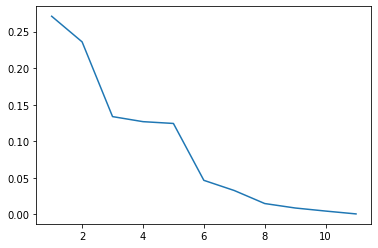

In [ ]:
plt.plot(range(1,12),pca.explained_variance_ratio_) #각 잠재변수의 분산비율 시각화
plt.show()

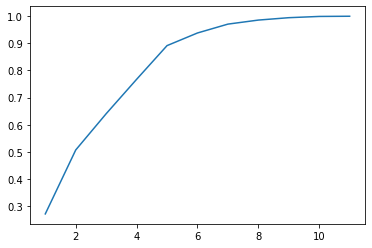

In [ ]:
cumulative = []
temp = 0
for i in range(0, 11):
    temp += pca.explained_variance_ratio_[i]
    cumulative.append(temp)

plt.plot(range(1,12),cumulative)
plt.show() #누적 분산비율 시각화

In [ ]:
for i in np.arange(1, 12):
  explained=np.sum(pca.explained_variance_ratio_[:i])
  print(i,'개의 잠재변수가 설명하는 분산은 전체 데이터의 {:.2f}%'.format(explained*100))

cumulative=np.array(cumulative)
print('전체 분산의 80%를 설명하기 위해서는 상위 {}개의 잠재변수 필요함'.format(np.where(cumulative>0.8)[0][0]))

1 개의 잠재변수가 설명하는 분산은 전체 데이터의 27.09%
2 개의 잠재변수가 설명하는 분산은 전체 데이터의 50.68%
3 개의 잠재변수가 설명하는 분산은 전체 데이터의 64.05%
4 개의 잠재변수가 설명하는 분산은 전체 데이터의 76.73%
5 개의 잠재변수가 설명하는 분산은 전체 데이터의 89.17%
6 개의 잠재변수가 설명하는 분산은 전체 데이터의 93.83%
7 개의 잠재변수가 설명하는 분산은 전체 데이터의 97.10%
8 개의 잠재변수가 설명하는 분산은 전체 데이터의 98.59%
9 개의 잠재변수가 설명하는 분산은 전체 데이터의 99.47%
10 개의 잠재변수가 설명하는 분산은 전체 데이터의 99.93%
11 개의 잠재변수가 설명하는 분산은 전체 데이터의 100.00%
전체 분산의 80%를 설명하기 위해서는 상위 4개의 잠재변수 필요함


In [ ]:
#fit은 주성분을 찾는것, transform은 주성분으로 변환하는 것

pca=PCA(n_components=7)
X_train_PCA=pca.fit_transform(X_train) #train은 fit + transform
X_test_PCA=pca.transform(X_test)       #test는 transform. 주성분은 train set에서 찾은 것을 사용해야 함
print('Original space:',X_train.shape)
print('After PCA:',X_train_PCA.shape)

Original space: (2000, 11)
After PCA: (2000, 7)


###PCA 이후 성능 비교


In [ ]:
start=time.time()
logistic_pca=LogisticRegression(max_iter=10000) 
logistic_pca.fit(X_train_PCA,y_train)

print('train accuracy:',accuracy_score(y_train, logistic_pca.predict(X_train_PCA)))
print('test accuracy:',accuracy_score(y_test, logistic_pca.predict(X_test_PCA)))

print('train f1 score:',f1_score(y_train, logistic_pca.predict(X_train_PCA)))
print('test f1 score:',f1_score(y_test, logistic_pca.predict(X_test_PCA)))

print(f'{time.time()-start:.4f}sec')

train accuracy: 0.7095
test accuracy: 0.71
train f1 score: 0.0
test f1 score: 0.0
0.0415sec


In [ ]:
start=time.time()
rf = RandomForestClassifier(max_depth = 20, n_estimators = 100)
rf.fit(X_train_PCA,y_train)

print('train accuracy:',accuracy_score(y_train, rf.predict(X_train_PCA)))
print('test accuracy:',accuracy_score(y_test, rf.predict(X_test_PCA)))

print('train f1 score:',f1_score(y_train, rf.predict(X_train_PCA)))
print('test f1 score:',f1_score(y_test, rf.predict(X_test_PCA)))

print(f'{time.time()-start:.4f}sec')

train accuracy: 0.9975
test accuracy: 0.686
train f1 score: 0.9956784788245463
test f1 score: 0.19487179487179487
0.6491sec


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

start=time.time()
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_PCA, y_train)


print('train accuracy:',accuracy_score(y_train, gb_clf.predict(X_train_PCA)))
print('test accuracy:',accuracy_score(y_test, gb_clf.predict(X_test_PCA)))

print('train f1 score:',f1_score(y_train, gb_clf.predict(X_train_PCA)))
print('test f1 score:',f1_score(y_test, gb_clf.predict(X_test_PCA)))

print(f'{time.time()-start:.4f}sec')

train accuracy: 0.7755
test accuracy: 0.728
train f1 score: 0.3789764868603043
test f1 score: 0.20930232558139536
0.5124sec


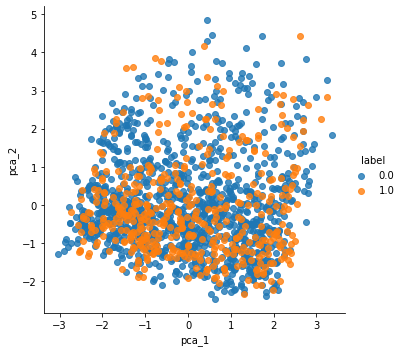

In [ ]:
X_train_pca=pd.DataFrame(X_train_PCA).loc[:,0:1]
X_train_pca=pd.concat((X_train_pca, y_train), axis=1) 
X_train_pca.columns=['pca_1', 'pca_2', 'label']

sns.lmplot(x='pca_1',y='pca_2',data=X_train_pca,hue='label',fit_reg=False)
plt.show()

### KPCA-rbf

In [ ]:
from sklearn.decomposition import KernelPCA
start=time.time()
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True) #방사형 커널 사용
X_train_rbf_pca=rbf_pca.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

0.6947sec


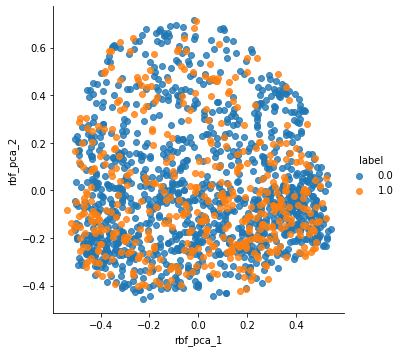

In [ ]:
X_train_rbf_pca=pd.DataFrame(X_train_rbf_pca).loc[:,0:1]
X_train_rbf_pca=pd.concat((X_train_rbf_pca, y_train), axis=1) 
X_train_rbf_pca.columns=['rbf_pca_1', 'rbf_pca_2', 'label']

sns.lmplot(x='rbf_pca_1',y='rbf_pca_2',data=X_train_rbf_pca,hue='label',fit_reg=False)
plt.show()

###KPCA-sigmoid

In [ ]:
start=time.time()
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True) #시그모이드 커널 사용
X_train_sig_pca=sig_pca.fit_transform(X_train)
#X_test_rbf_pca=sig_pca.fit_transform(X_test)
print(f'{time.time()-start:.4f}sec')

0.8633sec


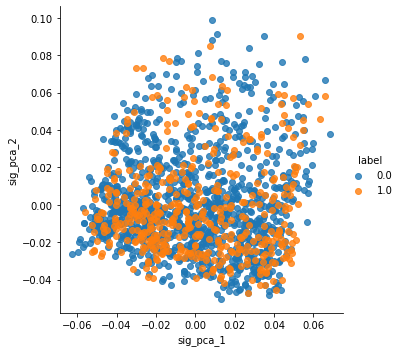

In [ ]:
X_train_sig_pca=pd.DataFrame(X_train_sig_pca).loc[:,0:1]
X_train_sig_pca=pd.concat((X_train_sig_pca, y_train), axis=1) 
X_train_sig_pca.columns=['sig_pca_1', 'sig_pca_2', 'label']

sns.lmplot(x='sig_pca_1',y='sig_pca_2',data=X_train_sig_pca,hue='label',fit_reg=False)
plt.show()

###KPCA-poly

In [ ]:
start=time.time()
poly_pca = KernelPCA(n_components = 2, kernel="poly", gamma=0.001, coef0=1, fit_inverse_transform=True) #시그모이드 커널 사용
X_train_poly_pca=poly_pca.fit_transform(X_train)
#X_test_rbf_pca=poly_pca.fit_transform(X_test)
print(f'{time.time()-start:.4f}sec')

0.7291sec


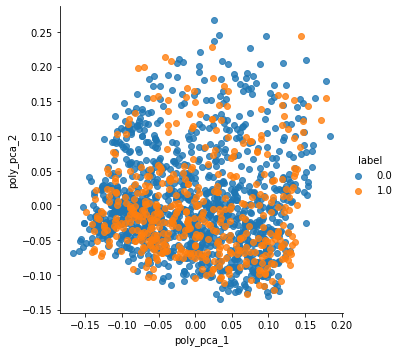

In [ ]:
X_train_poly_pca=pd.DataFrame(X_train_poly_pca).loc[:,0:1]
X_train_poly_pca=pd.concat((X_train_poly_pca, y_train), axis=1) 
X_train_poly_pca.columns=['poly_pca_1', 'poly_pca_2', 'label']

sns.lmplot(x='poly_pca_1',y='poly_pca_2',data=X_train_poly_pca,hue='label',fit_reg=False)
plt.show()

###KPCA-cos

In [ ]:
start=time.time()
cos_pca = KernelPCA(n_components = 2, kernel="cosine", gamma=0.001, coef0=1, fit_inverse_transform=True) #시그모이드 커널 사용
X_train_cos_pca=cos_pca.fit_transform(X_train)
#X_test_rbf_pca=cos_pca.fit_transform(X_test)
print(f'{time.time()-start:.4f}sec')

0.4872sec


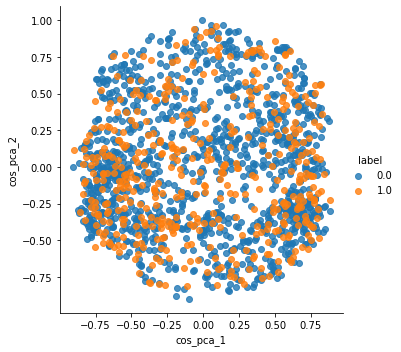

In [ ]:
X_train_cos_pca=pd.DataFrame(X_train_cos_pca).loc[:,0:1]
X_train_cos_pca=pd.concat((X_train_cos_pca, y_train), axis=1) 
X_train_cos_pca.columns=['cos_pca_1', 'cos_pca_2', 'label']

sns.lmplot(x='cos_pca_1',y='cos_pca_2',data=X_train_cos_pca,hue='label',fit_reg=False)
plt.show()

###MDS

In [ ]:
#시간 엄청 오래 걸림
from sklearn.manifold import MDS
start=time.time()
mds = MDS(n_components=2, random_state=42)
X_train_mds = mds.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

89.4526sec


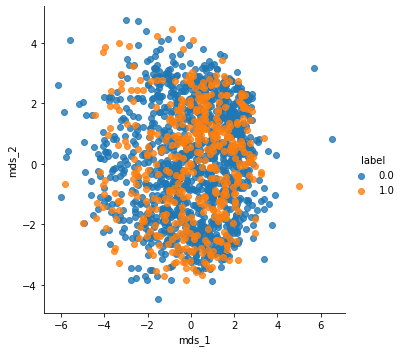

In [ ]:
X_train_mds=pd.DataFrame(X_train_mds).loc[:,0:1]
X_train_mds=pd.concat((X_train_mds, y_train), axis=1) 
X_train_mds.columns=['mds_1', 'mds_2', 'label']
X_train_mds

sns.lmplot(x='mds_1',y='mds_2',data=X_train_mds,hue='label',fit_reg=False)
plt.show()

###t-SNE

In [ ]:
from sklearn.manifold import TSNE
start=time.time()
tsne = TSNE(n_components=2, random_state=42) #4미만의 공간으로
X_train_tsne = tsne.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


11.6572sec


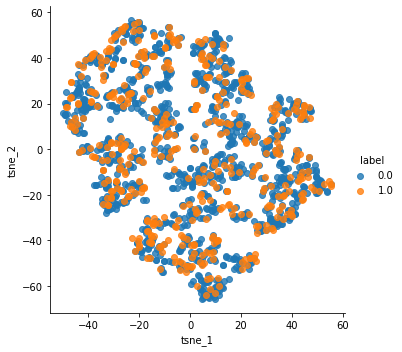

In [ ]:
X_train_tsne=pd.DataFrame(X_train_tsne).loc[:,0:1]
X_train_tsne=pd.concat((X_train_tsne, y_train), axis=1) 
X_train_tsne.columns=['tsne_1', 'tsne_2', 'label']
X_train_tsne

sns.lmplot(x='tsne_1',y='tsne_2',data=X_train_tsne,hue='label',fit_reg=False)
plt.show()

### LLE
- 주변 이웃들의 관계를 저차원에서도 그대로 유지하는 저차원 공간을 찾자

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
start=time.time()
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_train_lle = lle.fit_transform(X_train)
#X_test_lle=lle.transform(X_test)
print(f'{time.time()-start:.4f}sec')

0.2622sec


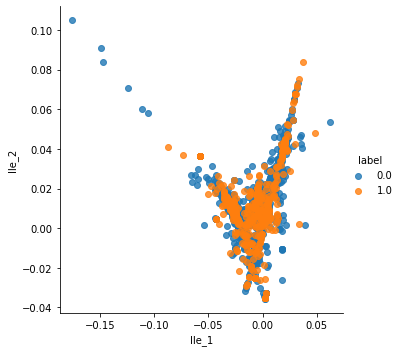

In [ ]:
X_train_lle=pd.DataFrame(X_train_lle).loc[:,0:1]
X_train_lle=pd.concat((X_train_lle, y_train), axis=1) 
X_train_lle.columns=['lle_1', 'lle_2', 'label']
X_train_lle

sns.lmplot(x='lle_1',y='lle_2',data=X_train_lle,hue='label',fit_reg=False)
plt.show()

### ISOMAP
- 지오데식 거리를 최대한 보존하는 저차원의 공간을 찾자

In [ ]:
from sklearn.manifold import Isomap
start=time.time()
isomap=Isomap(n_neighbors=5,n_components=2,n_jobs=4)         
X_train_isomap=isomap.fit_transform(X_train)
print(f'{time.time()-start:.4f}sec')

1.9134sec


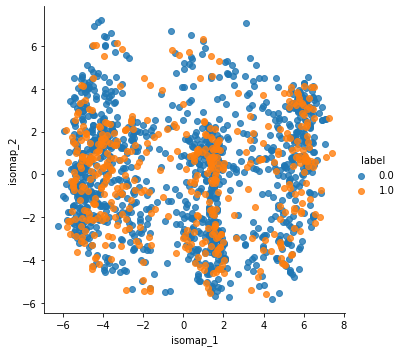

In [ ]:
X_train_isomap=pd.DataFrame(X_train_isomap).loc[:,0:1]
X_train_isomap=pd.concat((X_train_isomap, y_train), axis=1) 
X_train_isomap.columns=['isomap_1', 'isomap_2', 'label']

sns.lmplot(x='isomap_1',y='isomap_2',data=X_train_isomap,hue='label',fit_reg=False)
plt.show()

###LDA



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
start=time.time()
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train) #차원축소 과정에 y라벨값을 입력해줌
print(f'{time.time()-start:.4f}sec')

ValueError: ignored

In [ ]:
X_train_lda=pd.DataFrame(X_train_lda).loc[:,0:1]
X_train_lda=pd.concat((X_train_lda, y_train), axis=1) 
X_train_lda.columns=['lda_1', 'lda_2', 'label']
X_train_lda

sns.lmplot(x='lda_1',y='lda_2',data=X_train_lda,hue='label',fit_reg=False)
plt.show()